In [255]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
stats = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/fulldata_not_encoded.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
stats.head()

,Unnamed: 0,name,bats,throws,age,year,stints,teamID,lg,G,...,woba,PRO,GURU,pos1,salary,multiple_positions,ops,WAR,count,Rookie contract
0,0,Jo Abreu,R,R,32,2019,1,CHA,AL,159.0,...,0.354834,245.90,79.642904,1B,16.0150,0,0.833602,1.6,1,0
1,3,Wi Adames,R,R,23,2019,1,TBA,AL,152.0,...,0.320257,187.03,49.147818,SS,0.5624,0,0.734774,3.3,1,1
2,4,Ma Adams,L,R,30,2019,1,WAS,NL,111.0,...,0.314294,104.66,32.037226,1B,3.0000,0,0.740792,-0.2,1,0
3,6,Eh Adrianza,B,R,29,2019,1,MIN,AL,83.0,...,0.334829,78.35,32.184009,3B,1.3000,1,0.764980,0.7,1,0
4,8,Ni Ahmed,R,R,29,2019,1,ARI,NL,158.0,...,0.323952,202.47,53.517840,SS,3.6625,0,0.752755,3.3,1,0


In [257]:
stats.drop(columns = ['Unnamed: 0', 'name', 'year', 'teamID', 'lg', 'count'], inplace = True)

# One-hot encode the batting stance, throwing arm, and position

In [258]:
dummy_position = pd.get_dummies(stats['pos1'], prefix = 'position')
dummy_throws = pd.get_dummies(stats['bats'], prefix = 'bats')
dummy_bats = pd.get_dummies(stats['throws'], prefix = 'throws')

In [259]:
dummies = [dummy_position, dummy_throws, dummy_bats]
#Add the one hot coded dataframes for position, throwing hand, and batting stance into the original stats dataframe
for item in dummies:
  stats = pd.merge(left = stats, right = item, left_index = True, right_index = True)
#Drop the old columns holding bats and throws since we have this info in one hot encoded format already in the dataframe
stats.drop(columns = ['bats','throws','pos1'], axis = 1, inplace = True)
stats.reindex()
stats.head()

,age,stints,G,tap,AB,R,H,db,tr,HR,...,position_C,position_DH,position_OF,position_P,position_SS,bats_B,bats_L,bats_R,throws_L,throws_R
0,32,1,159.0,693.0,634.0,85.0,180.0,38.0,1.0,33.0,...,0,0,0,0,0,0,0,1,0,1
1,23,1,152.0,584.0,531.0,69.0,135.0,25.0,1.0,20.0,...,0,0,0,0,1,0,0,1,0,1
2,30,1,111.0,333.0,310.0,42.0,70.0,14.0,0.0,20.0,...,0,0,0,0,0,0,1,0,0,1
3,29,1,83.0,234.0,202.0,34.0,55.0,8.0,3.0,5.0,...,0,0,0,0,0,1,0,0,0,1
4,29,1,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,...,0,0,0,0,1,0,0,1,0,1


#For visualization purposes we will filter out players on rookie contracts as we noted before that their salary always lies in a certain lower range regardless of their stats

In [260]:
 stats_nonrookie = stats.loc[stats['Rookie contract'] == 0]

# Normalize all features to allow for better visualization

In [261]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
normalized = scale.fit_transform(stats_nonrookie)
print(normalized)

[[0.42857143 0.         0.98064516 ... 1.         0.         1.        ]
 [0.28571429 0.         0.67096774 ... 0.         0.         1.        ]
 [0.21428571 0.         0.49032258 ... 0.         0.         1.        ]
 ...
 [0.57142857 0.         0.29032258 ... 1.         0.         1.        ]
 [0.85714286 0.         0.25806452 ... 0.         0.         1.        ]
 [0.14285714 0.         0.53548387 ... 1.         0.         1.        ]]


In [262]:
#convert the numpy array back to pandas dataframe with column names
stats_normalized = pd.DataFrame(normalized, columns = stats.columns)
stats_normalized.head()

,age,stints,G,tap,AB,R,H,db,tr,HR,...,position_C,position_DH,position_OF,position_P,position_SS,bats_B,bats_L,bats_R,throws_L,throws_R
0,0.428571,0.0,0.980645,0.926928,0.930267,0.629630,0.873786,0.655172,0.1,0.673469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.285714,0.0,0.670968,0.439783,0.449555,0.311111,0.339806,0.241379,0.0,0.408163,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.214286,0.0,0.490323,0.305819,0.289318,0.251852,0.266990,0.137931,0.3,0.102041,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.214286,0.0,0.974194,0.834912,0.814540,0.585185,0.684466,0.568966,0.6,0.387755,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.000000,0.0,0.851613,0.733424,0.767062,0.459259,0.776699,0.362069,0.2,0.244898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [263]:
#Write a function to plot feature vs. feature so we don't have to repeat our matplotlib code over and over
def scatter_plotxy(dataframe, x, target, color, position):
  ind = dataframe[x]
  dep = dataframe[target]
  plt_1 = plt.figure(figsize=(5,5))
  plt.scatter(ind,dep,s=10, alpha = 0.6, color = color)
  plt.xlabel(x)
  plt.ylabel(target)
  plt.title(target + ' vs. ' + x + ' (' + position + ')')

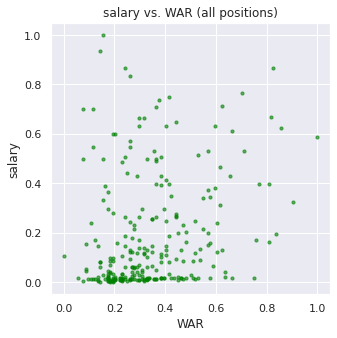

In [264]:
#Visualize what features contribute to salary for position players in the MLB.
import matplotlib.pyplot as plt
scatter_plotxy(stats_normalized,'WAR', 'salary', 'green','all positions')

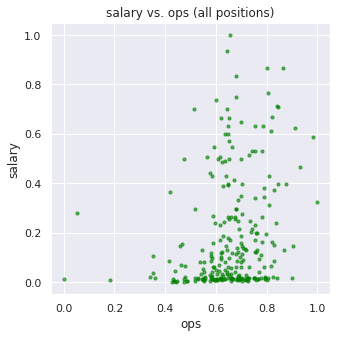

In [265]:
scatter_plotxy(stats_normalized,'ops', 'salary', 'green','all positions')

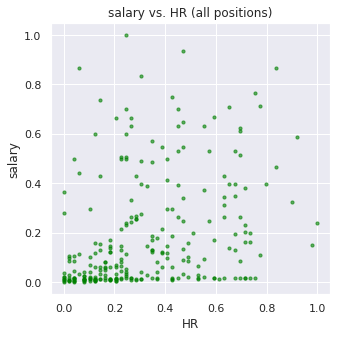

In [266]:
scatter_plotxy(stats_normalized,'HR', 'salary', 'green','all positions')

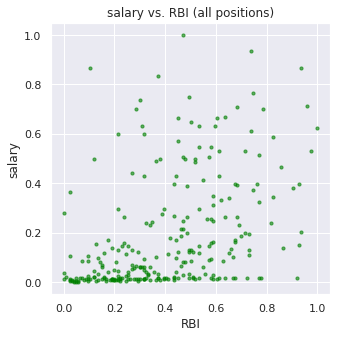

In [267]:
scatter_plotxy(stats_normalized,'RBI', 'salary', 'green','all positions')

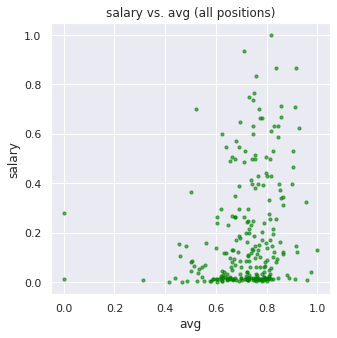

In [268]:
scatter_plotxy(stats_normalized,'avg', 'salary', 'green','all positions')

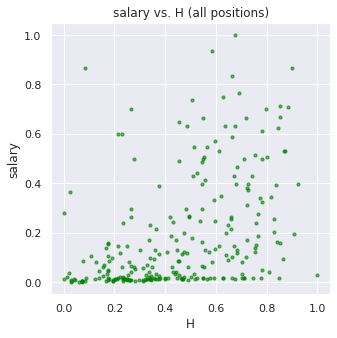

In [269]:
scatter_plotxy(stats_normalized,'H', 'salary', 'green','all positions')

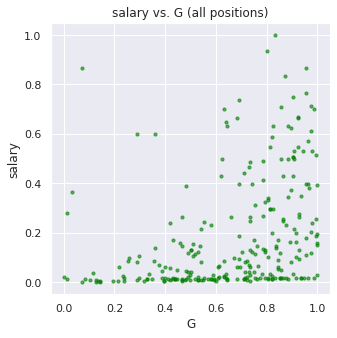

In [270]:
scatter_plotxy(stats_normalized,'G', 'salary', 'green','all positions')

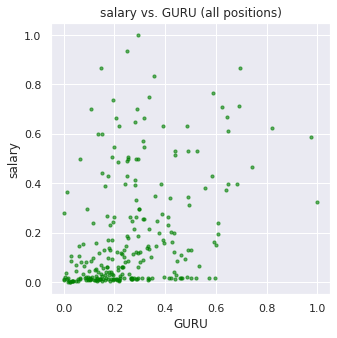

In [271]:
scatter_plotxy(stats_normalized,'GURU', 'salary', 'green','all positions')

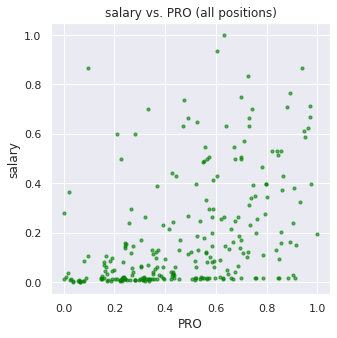

In [272]:
scatter_plotxy(stats_normalized,'PRO', 'salary', 'green','all positions')

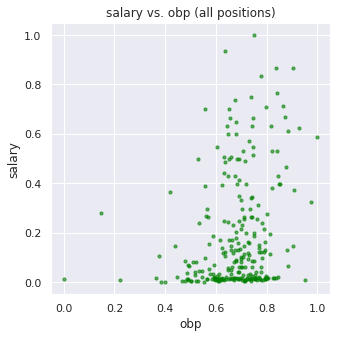

In [273]:
scatter_plotxy(stats_normalized,'obp', 'salary', 'green','all positions')

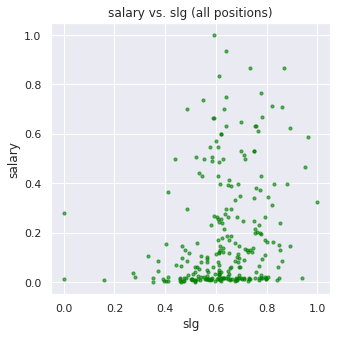

In [274]:
scatter_plotxy(stats_normalized,'slg', 'salary', 'green','all positions')

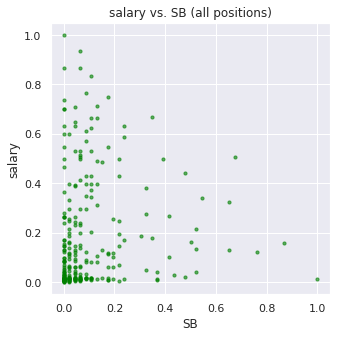

In [275]:
scatter_plotxy(stats_normalized,'SB', 'salary', 'green','all positions')

# Positional Analysis

# First Basemen

In [276]:
#We will start by doing position wide visualizations to see what features contribute to salary.
#We continue to use the .loc function to filter our results
first_base = stats_normalized.loc[stats_normalized['position_1B'] == 1]

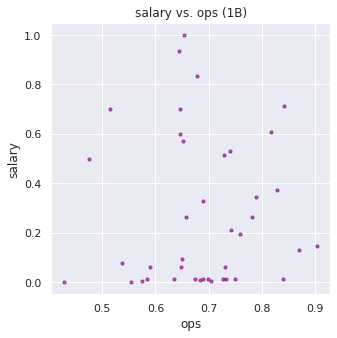

In [277]:
scatter_plotxy(first_base,'ops', 'salary', 'purple','1B')

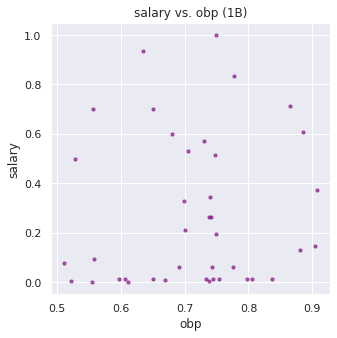

In [278]:
scatter_plotxy(first_base,'obp', 'salary', 'purple','1B')

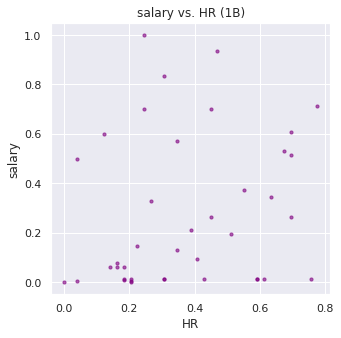

In [279]:
scatter_plotxy(first_base,'HR', 'salary', 'purple','1B')

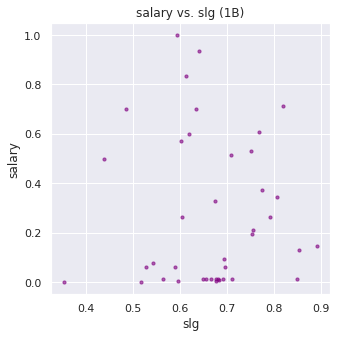

In [280]:
scatter_plotxy(first_base,'slg', 'salary', 'purple','1B')

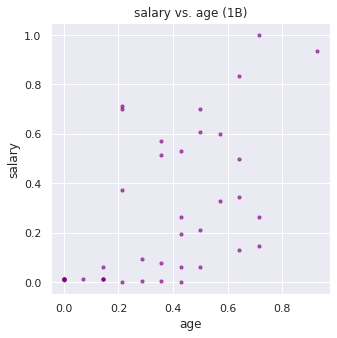

In [281]:
scatter_plotxy(first_base,'age', 'salary', 'purple','1B')

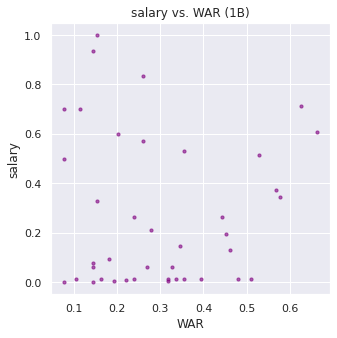

In [282]:
scatter_plotxy(first_base,'WAR', 'salary', 'purple','1B')

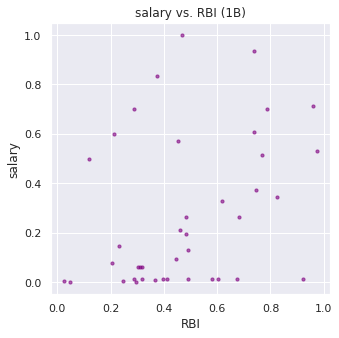

In [283]:
scatter_plotxy(first_base,'RBI', 'salary', 'purple','1B')

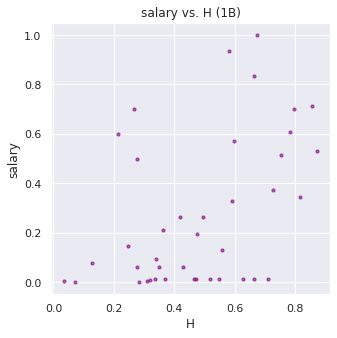

In [284]:
scatter_plotxy(first_base,'H', 'salary', 'purple','1B')

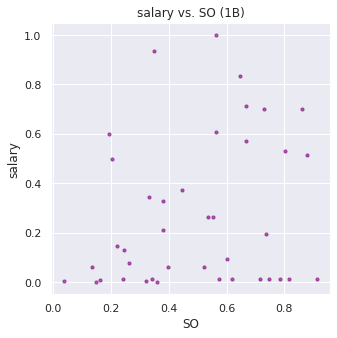

In [285]:
scatter_plotxy(first_base,'SO', 'salary', 'purple','1B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 0, 'Salary (millions)')

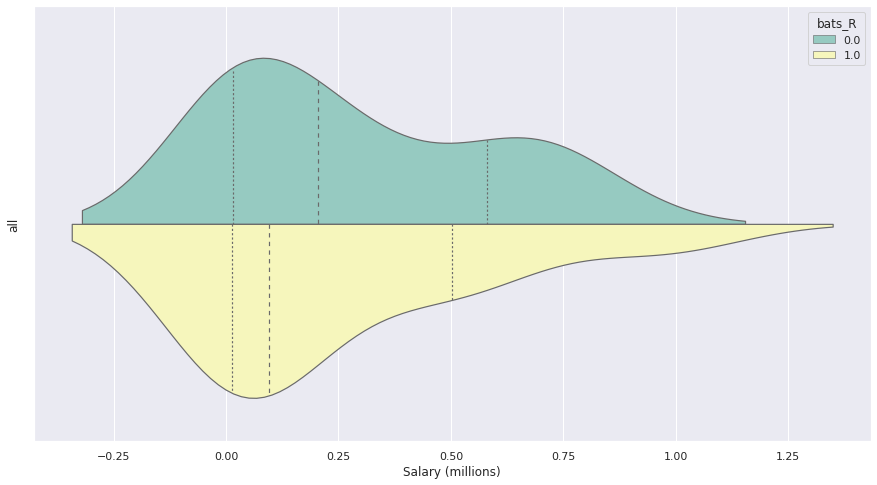

In [286]:
import seaborn as sns

sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
first_base['all'] = ''
ax = sns.violinplot(x = first_base['salary'], y = first_base['all'], palette = 'Set3', hue = first_base['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'Salary (millions)')

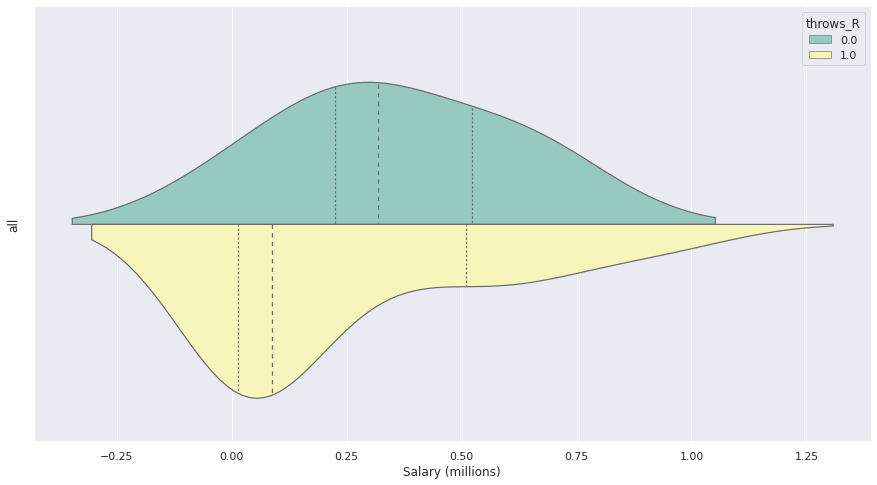

In [287]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = first_base['salary'], y = first_base['all'], palette = 'Set3', hue = first_base['throws_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

# Second Basemen

In [288]:
second_b = stats_normalized.loc[stats_normalized['position_2B'] == 1]

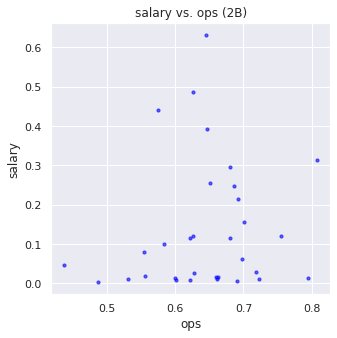

In [289]:
scatter_plotxy(second_b,'ops', 'salary', 'blue','2B')

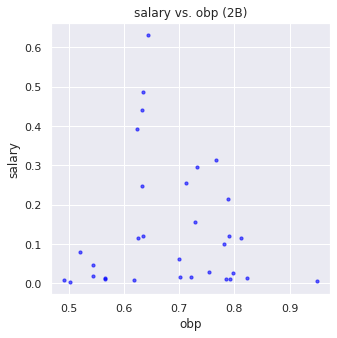

In [290]:
scatter_plotxy(second_b, 'obp', 'salary', 'blue', '2B')

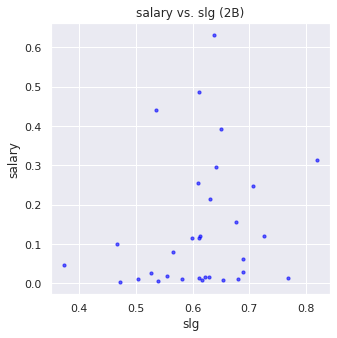

In [291]:
scatter_plotxy(second_b, 'slg', 'salary', 'blue', '2B')

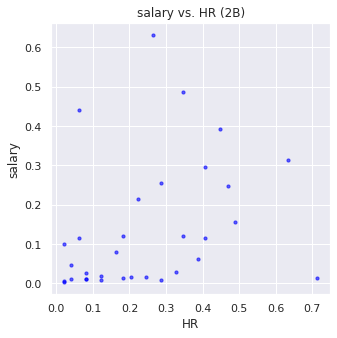

In [292]:
scatter_plotxy(second_b, 'HR', 'salary', 'blue', '2B')

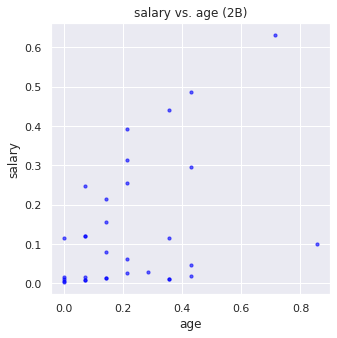

In [293]:
scatter_plotxy(second_b, 'age', 'salary', 'blue', '2B')

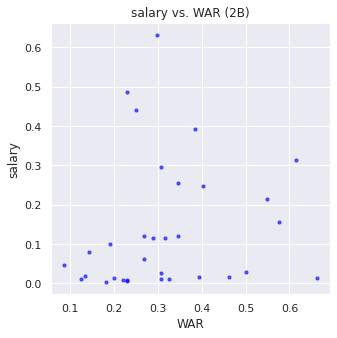

In [294]:
scatter_plotxy(second_b, 'WAR', 'salary', 'blue', '2B')

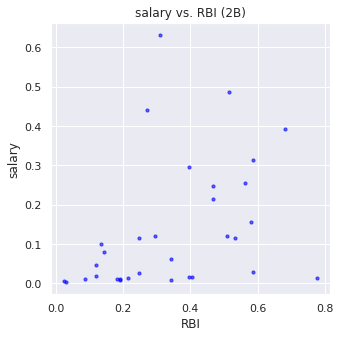

In [295]:
scatter_plotxy(second_b, 'RBI', 'salary', 'blue', '2B')

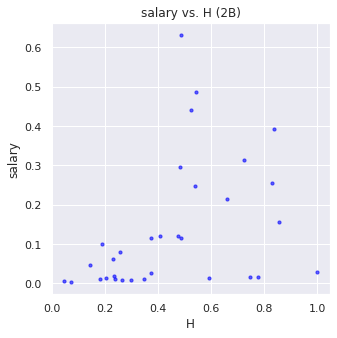

In [296]:
scatter_plotxy(second_b, 'H', 'salary', 'blue', '2B')

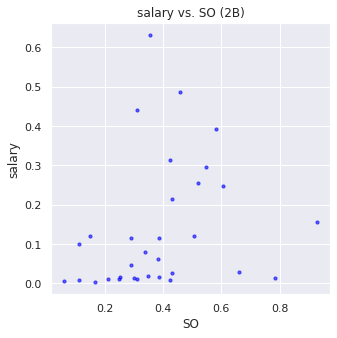

In [297]:
scatter_plotxy(second_b, 'SO', 'salary', 'blue', '2B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

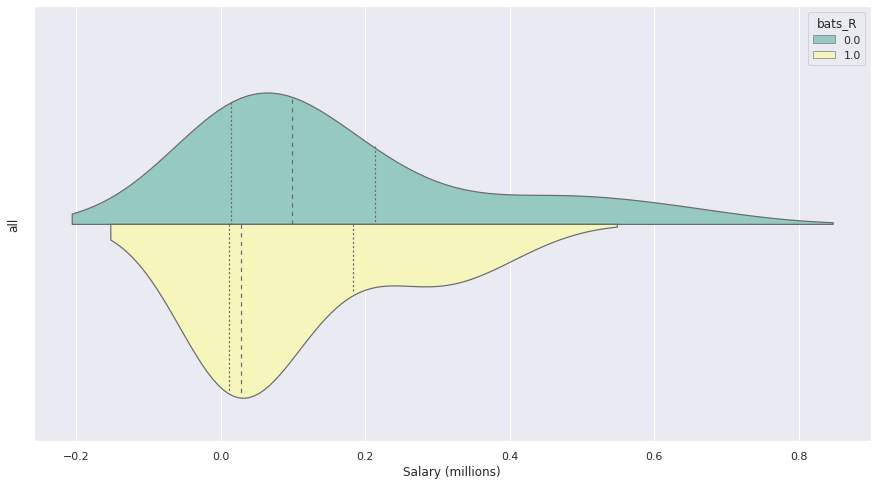

In [298]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
second_b['all'] = ''
ax = sns.violinplot(x = second_b['salary'], y = second_b['all'], palette = 'Set3', hue = second_b['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

# Shortstops

In [299]:
#Now visualize how different stats affect player salary for shortstops
short = stats_normalized.loc[stats_normalized['position_SS'] == 1]

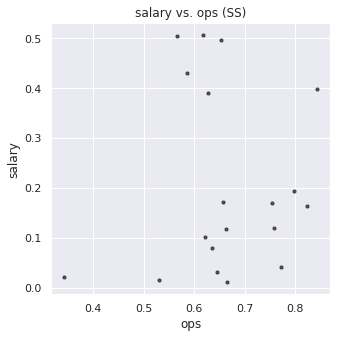

In [300]:
scatter_plotxy(short, 'ops', 'salary', 'black', 'SS')

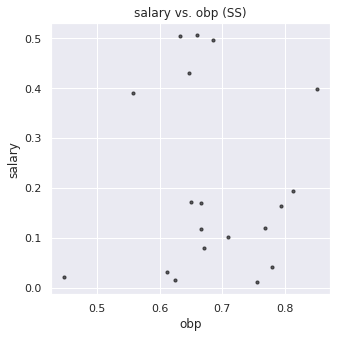

In [301]:
scatter_plotxy(short, 'obp', 'salary', 'black', 'SS')

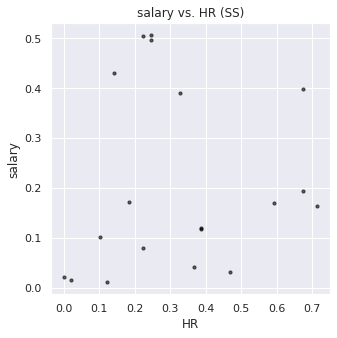

In [302]:
scatter_plotxy(short, 'HR', 'salary', 'black', 'SS')

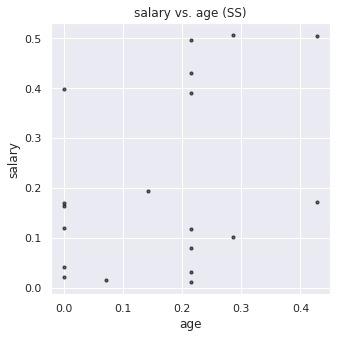

In [303]:
scatter_plotxy(short, 'age', 'salary', 'black', 'SS')

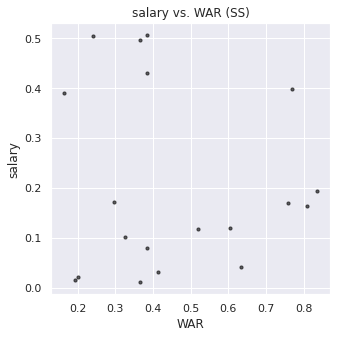

In [304]:
scatter_plotxy(short, 'WAR', 'salary', 'black', 'SS')

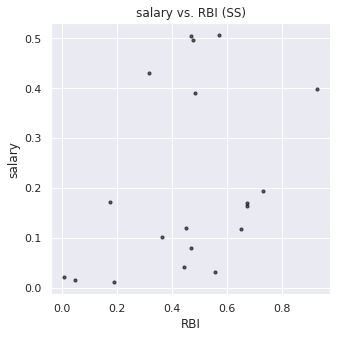

In [305]:
scatter_plotxy(short, 'RBI', 'salary', 'black', 'SS')

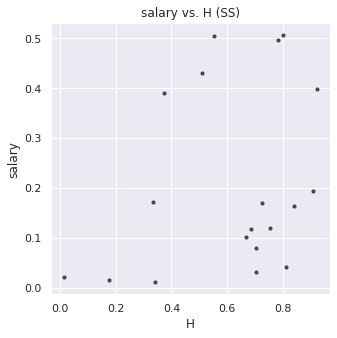

In [306]:
scatter_plotxy(short, 'H', 'salary', 'black', 'SS')

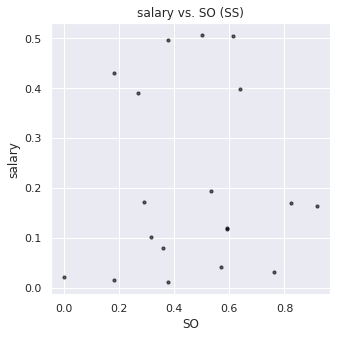

In [307]:
scatter_plotxy(short, 'SO', 'salary', 'black', 'SS')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

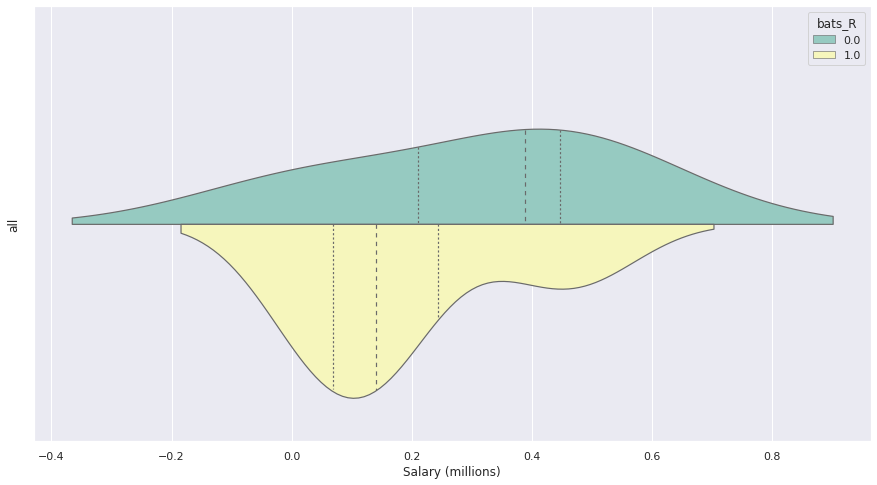

In [308]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
short['all'] = ''
ax = sns.violinplot(x = short['salary'], y = short['all'], palette = 'Set3', hue = short['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

# Third Basemen

In [309]:
#Now visualize how different features affect player salary for third baseman
third = stats_normalized.loc[stats_normalized['position_3B'] == 1]

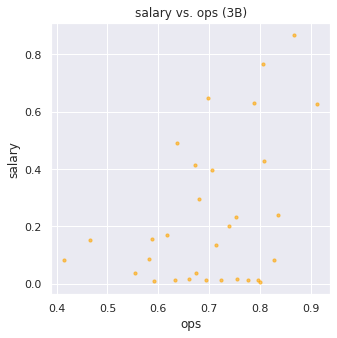

In [310]:
scatter_plotxy(third, 'ops', 'salary', 'orange', '3B')

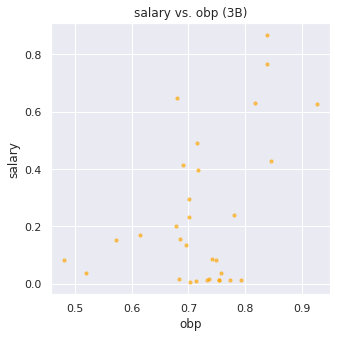

In [311]:
scatter_plotxy(third, 'obp', 'salary', 'orange', '3B')

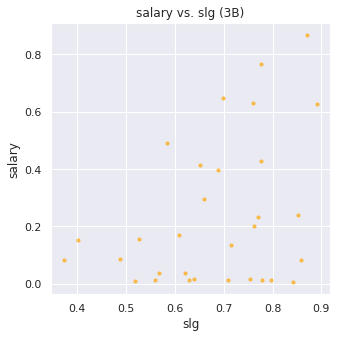

In [312]:
scatter_plotxy(third, 'slg', 'salary', 'orange', '3B')

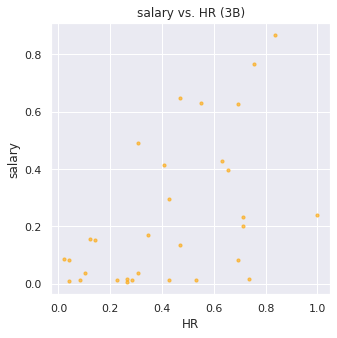

In [313]:
scatter_plotxy(third, 'HR', 'salary', 'orange', '3B')

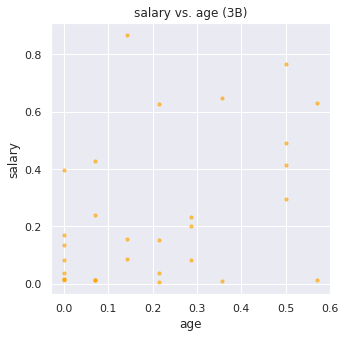

In [314]:
scatter_plotxy(third, 'age', 'salary', 'orange', '3B')

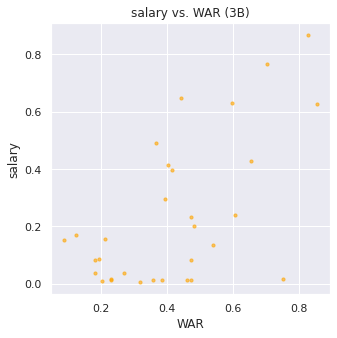

In [315]:
scatter_plotxy(third, 'WAR', 'salary', 'orange', '3B')

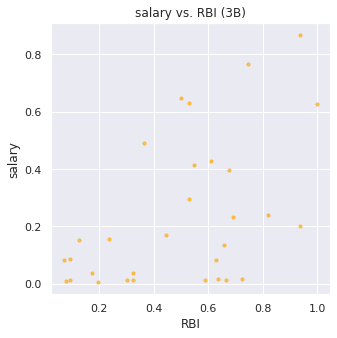

In [316]:
scatter_plotxy(third, 'RBI', 'salary', 'orange', '3B')

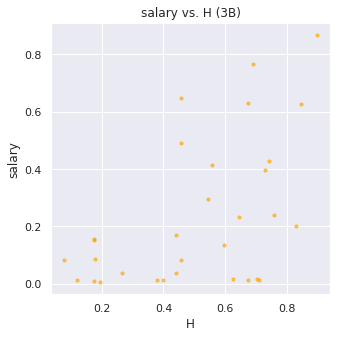

In [317]:
scatter_plotxy(third, 'H', 'salary', 'orange', '3B')

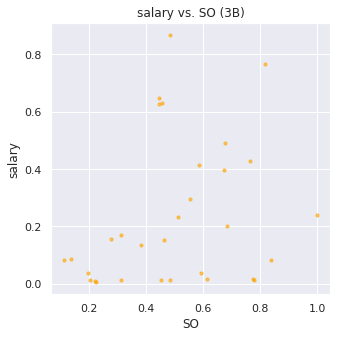

In [318]:
scatter_plotxy(third, 'SO', 'salary', 'orange', '3B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

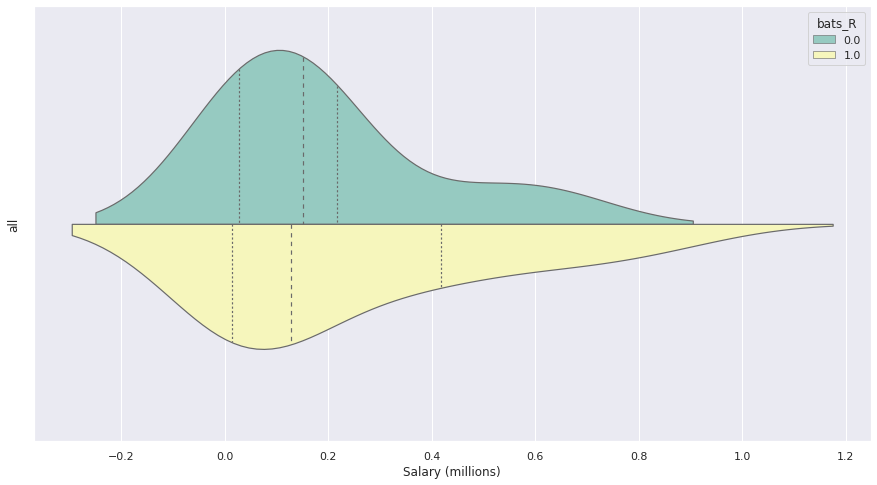

In [319]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
third['all'] = ''
ax = sns.violinplot(x = third['salary'], y = third['all'], palette = 'Set3', hue = third['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

# Catchers

In [320]:
#Now visualize how different features affect player salary for catchers
catcher = stats_normalized.loc[stats_normalized['position_C'] == 1]

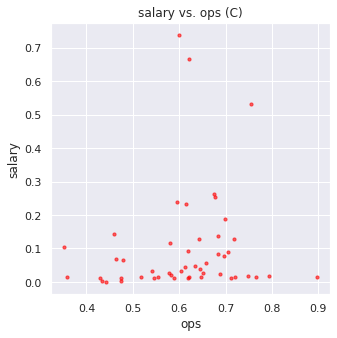

In [321]:
scatter_plotxy(catcher, 'ops', 'salary', 'red', 'C')

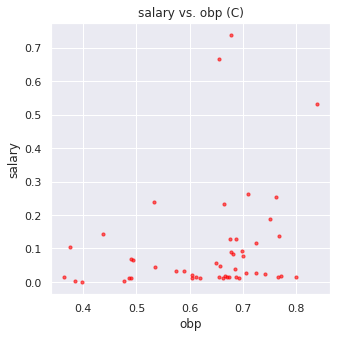

In [322]:
scatter_plotxy(catcher, 'obp', 'salary', 'red', 'C')

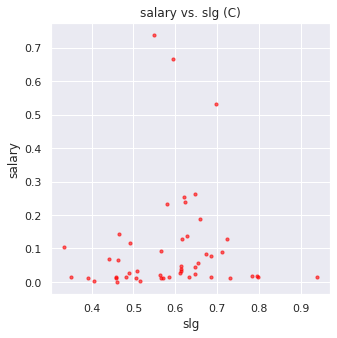

In [323]:
scatter_plotxy(catcher, 'slg', 'salary', 'red', 'C')

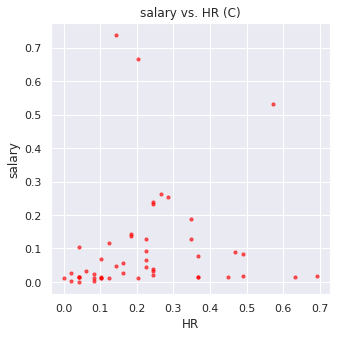

In [324]:
scatter_plotxy(catcher, 'HR', 'salary', 'red', 'C')

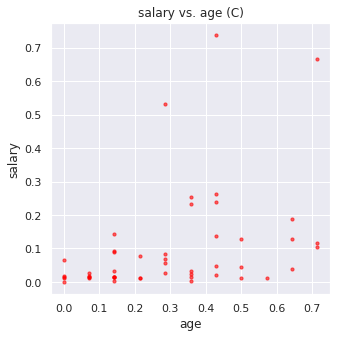

In [325]:
scatter_plotxy(catcher, 'age', 'salary', 'red', 'C')

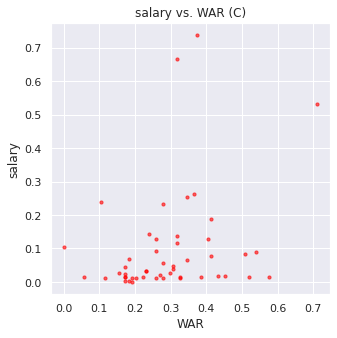

In [326]:
scatter_plotxy(catcher, 'WAR', 'salary', 'red', 'C')

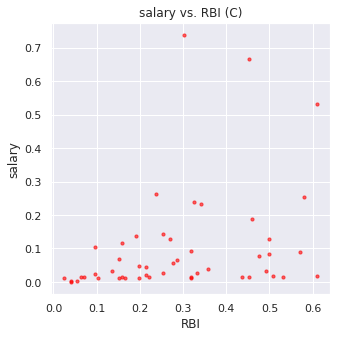

In [327]:
scatter_plotxy(catcher, 'RBI', 'salary', 'red', 'C')

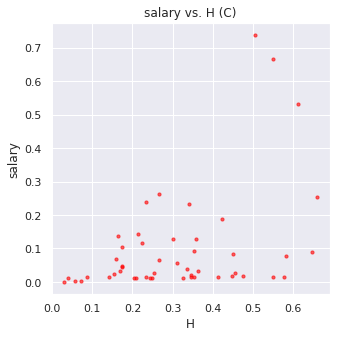

In [328]:
scatter_plotxy(catcher, 'H','salary', 'red','C')

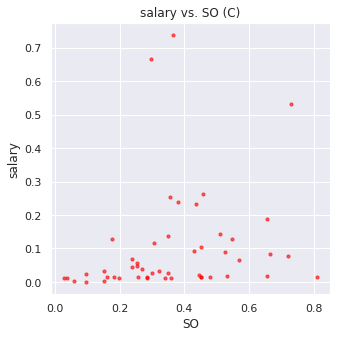

In [329]:
scatter_plotxy(catcher, 'SO','salary', 'red','C')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

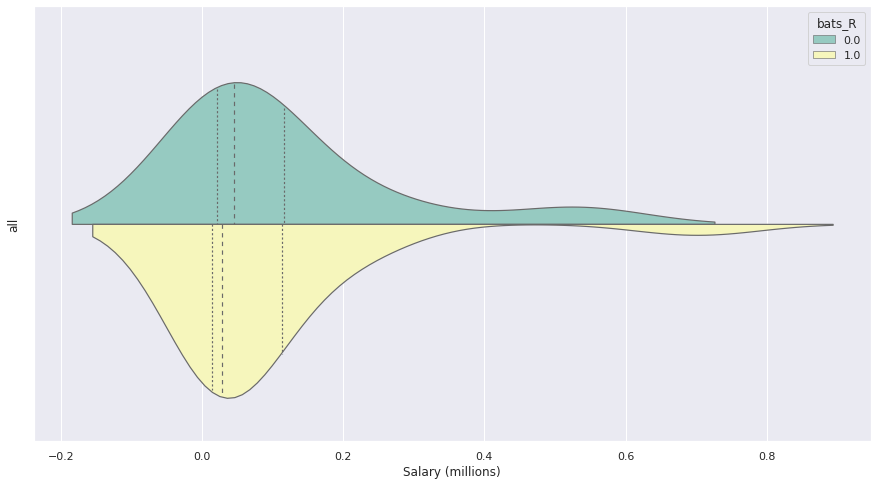

In [330]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
catcher['all'] = ''
ax = sns.violinplot(x = catcher['salary'], y = catcher['all'], palette = 'Set3', hue = catcher['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

# Outfielders

In [331]:
outfield = stats_normalized.loc[stats_normalized['position_OF'] == 1]

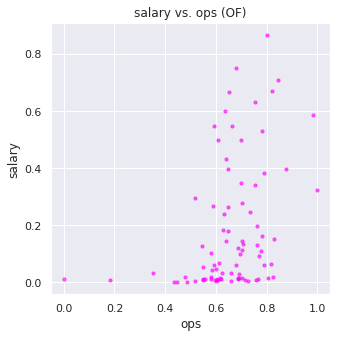

In [332]:
scatter_plotxy(outfield,'ops', 'salary', 'magenta', 'OF')

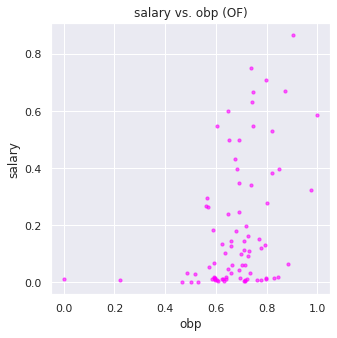

In [333]:
scatter_plotxy(outfield,'obp', 'salary', 'magenta', 'OF')

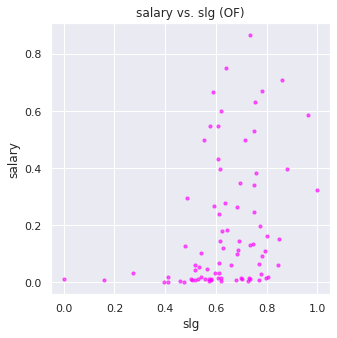

In [334]:
scatter_plotxy(outfield,'slg', 'salary', 'magenta', 'OF')

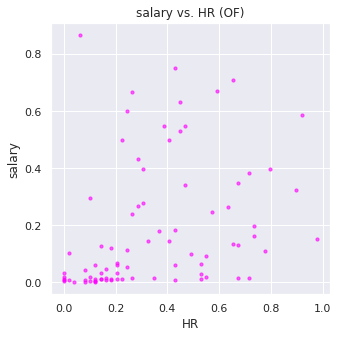

In [335]:
scatter_plotxy(outfield,'HR', 'salary', 'magenta', 'OF')

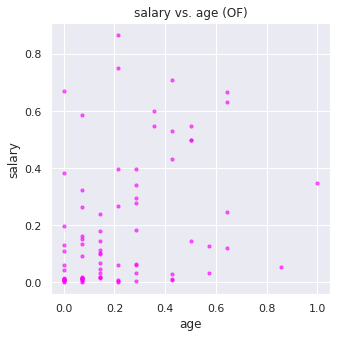

In [336]:
scatter_plotxy(outfield,'age', 'salary', 'magenta', 'OF')

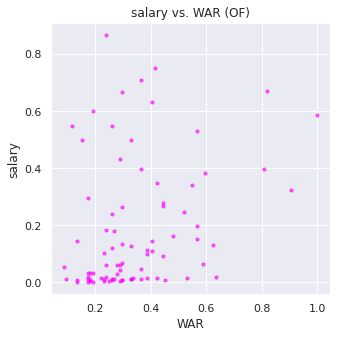

In [337]:
scatter_plotxy(outfield,'WAR', 'salary', 'magenta', 'OF')

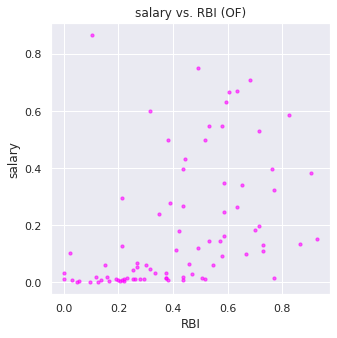

In [338]:
scatter_plotxy(outfield,'RBI', 'salary', 'magenta', 'OF')

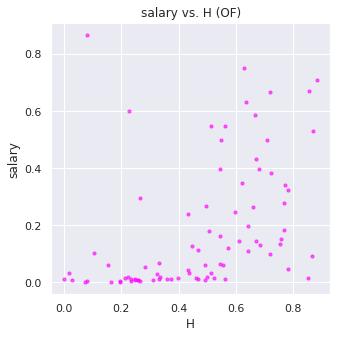

In [339]:
scatter_plotxy(outfield,'H', 'salary', 'magenta', 'OF')

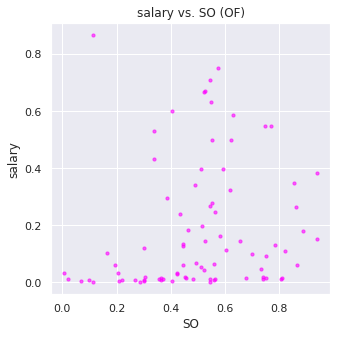

In [340]:
scatter_plotxy(outfield,'SO', 'salary', 'magenta', 'OF')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

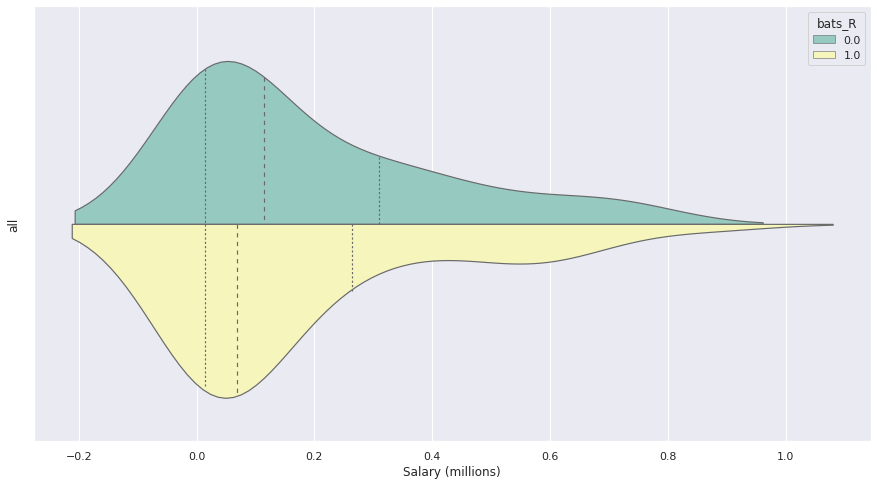

In [341]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
outfield['all'] = ''
ax = sns.violinplot(x = outfield['salary'], y = outfield['all'], palette = 'Set3', hue = outfield['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'Salary (millions)')

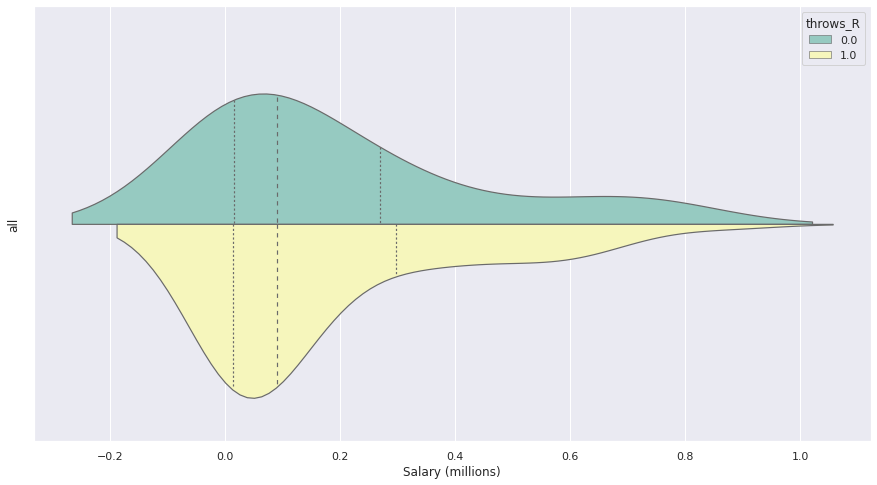

In [342]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = outfield['salary'], y = outfield['all'], palette = 'Set3', hue = outfield['throws_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

# Designated Hitters

After, creating one scatter, we see that our dataset has only 3 designated hitters so we don't create the rest as these visualizations are not helpful with 3 points

In [343]:
#Now visualize how different stats affect player salary for designated hitters
dh = stats_normalized.loc[stats_normalized['position_DH'] == 1]

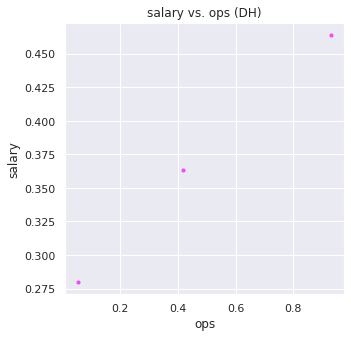

In [344]:
scatter_plotxy(dh, 'ops', 'salary', 'magenta', 'DH')